In [5]:
import numpy as np
import pandas as pd
import scanpy as sc
import os
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [22]:
path='/nemo/lab/gandhis/home/users/wagena/Astrocytes_editing/figures/single_cell_gene_expression/'
sc.settings.figdir = path
# Set the font to Arial
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = 'DejaVu Sans'
# Set the global font size
rcParams['font.size'] = 10
# Set the font type to TrueType (Type 42) for PDF export
rcParams['pdf.fonttype'] = 42

In [7]:
adata = sc.read_h5ad('/nemo/lab/gandhis/home/users/wagena/AIediting/raw_data/acta_neuropath_bulk/single_cell/PD_reynolds_snrnaseq_leiden.h5ad')


In [8]:
astro = pd.read_csv('/nemo/lab/gandhis/home/users/grantpm/PD_LR_project/subclustering/subclustered_annotations/astrocytes.csv', index_col = 0)
endo = pd.read_csv('/nemo/lab/gandhis/home/users/grantpm/PD_LR_project/subclustering/subclustered_annotations/endothelial.csv', index_col = 0)
micro = pd.read_csv('/nemo/lab/gandhis/home/users/grantpm/PD_LR_project/subclustering/subclustered_annotations/microglia.csv', index_col = 0)
neurons = pd.read_csv('/nemo/lab/gandhis/home/users/grantpm/PD_LR_project/subclustering/subclustered_annotations/neurons.csv', index_col = 0)
ogs = pd.read_csv('/nemo/lab/gandhis/home/users/grantpm/PD_LR_project/subclustering/subclustered_annotations/oligodendrocytes.csv', index_col = 0)


In [9]:
annotation = pd.concat([astro, endo, micro, neurons, ogs], axis = 0).rename(columns = {'leiden_0.2' : 'annotation_level_1'})

In [10]:
adata.obs = adata.obs.merge(annotation, left_on = 'index', right_on = 'index', how = 'left')


In [11]:
adata = adata[(adata.obs['annotation_level_1']!='drop') & (adata.obs['annotation_level_1'].isnull()==False)]
adata = adata[adata.obs['disease'].isnull()==False]

/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


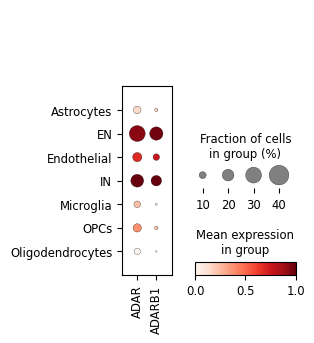

/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


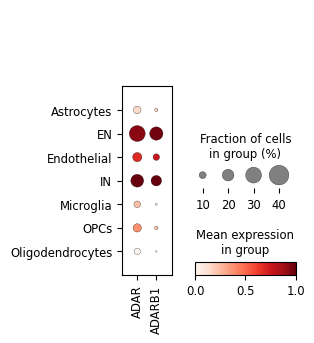

In [33]:
# Plot disease and control together in the same plot
genes = ['ADAR', 'ADARB1']
sc.pl.dotplot(adata, genes, groupby='annotation_level_1', cmap = 'Reds', standard_scale = 'var', save = 'ACC_alldata_dotplot_2ADARgenes.png')
sc.pl.dotplot(adata, genes, groupby='annotation_level_1', cmap = 'Reds', standard_scale = 'var', save = 'ACC_alldata_dotplot_2ADARgenes.pdf')

In [34]:
# Make combined variable to plot PD and control next to each other
adata.obs['combined_group'] = adata.obs['disease'].astype(str) + '_' + adata.obs['annotation_level_1'].astype(str)


/camp/home/wagena/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


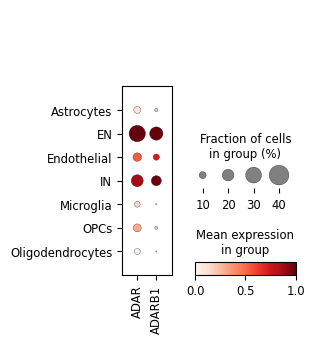

/camp/home/wagena/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


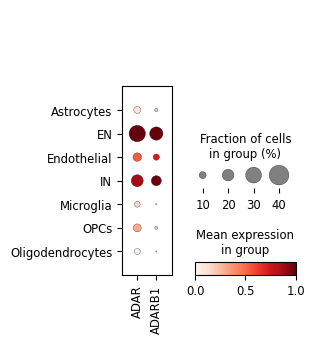

/camp/home/wagena/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()


/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


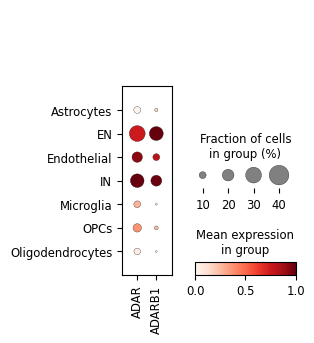

/camp/home/wagena/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


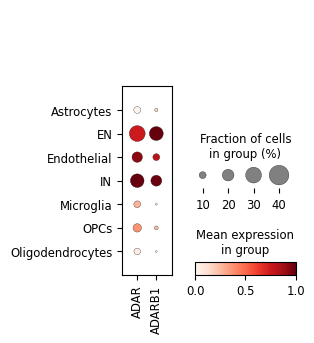

/camp/home/wagena/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


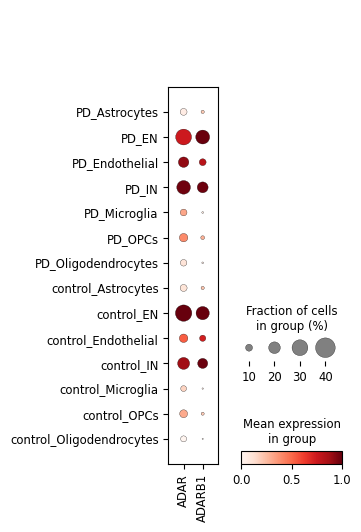

/camp/home/wagena/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


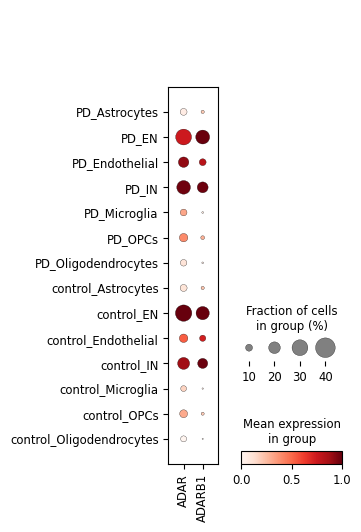

In [36]:
sc.pl.dotplot(adata[adata.obs['disease']=='control'], genes, groupby='annotation_level_1', cmap = 'Reds', standard_scale = 'var', save='ACC_control_dotplot_ADARgenes.png')
sc.pl.dotplot(adata[adata.obs['disease']=='control'], genes, groupby='annotation_level_1', cmap = 'Reds', standard_scale = 'var', save='ACC_control_dotplot_ADARgenes.pdf')
sc.pl.dotplot(adata[adata.obs['disease']=='PD'], genes, groupby='annotation_level_1', cmap = 'Reds', standard_scale = 'var', save='ACC_PD_dotplot_ADARgenes.png')
sc.pl.dotplot(adata[adata.obs['disease']=='PD'], genes, groupby='annotation_level_1', cmap = 'Reds', standard_scale = 'var', save='ACC_PD_dotplot_ADARgenes.pdf')
sc.pl.dotplot(adata[adata.obs['disease'].isin(['PD', 'control'])], genes, groupby='combined_group', cmap='Reds', standard_scale='var', save='ACC_combined_dotplot_ADARgenes.png')
sc.pl.dotplot(adata[adata.obs['disease'].isin(['PD', 'control'])], genes, groupby='combined_group', cmap='Reds', standard_scale='var', save='ACC_combined_dotplot_ADARgenes.pdf')

/camp/home/wagena/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


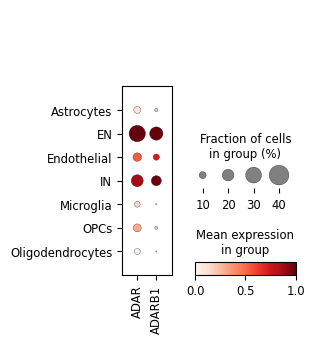

/camp/home/wagena/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


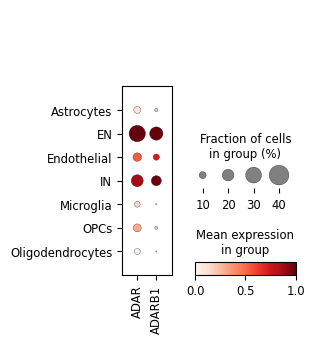

/camp/home/wagena/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


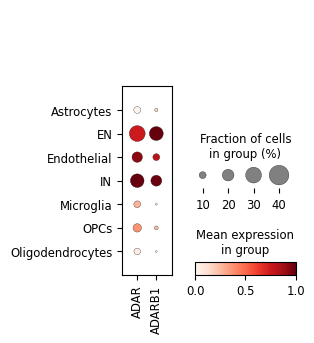

/camp/home/wagena/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/camp/home/wagena/.local/lib/pyt

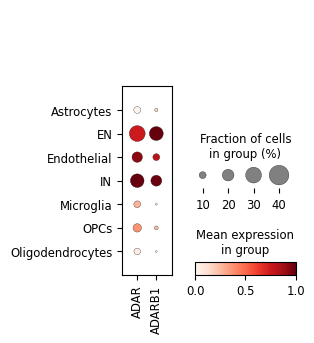

/camp/home/wagena/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


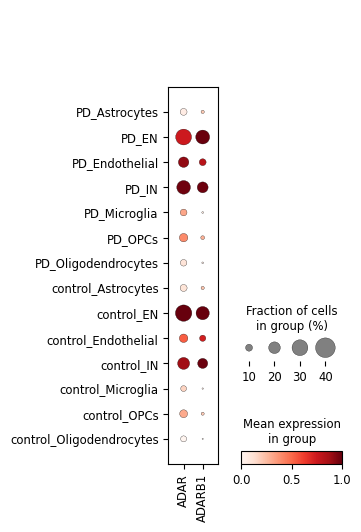

/camp/home/wagena/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


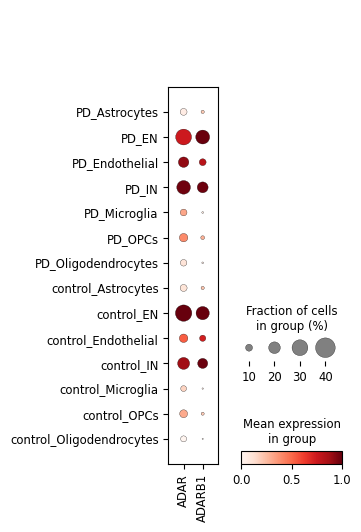

In [37]:
#plot with just 2 genes
genes = ['ADAR', 'ADARB1']
sc.pl.dotplot(adata[adata.obs['disease']=='control'], genes, groupby='annotation_level_1', cmap = 'Reds', standard_scale = 'var', save='ACC_control_dotplot_2ADARgenes.png')
sc.pl.dotplot(adata[adata.obs['disease']=='control'], genes, groupby='annotation_level_1', cmap = 'Reds', standard_scale = 'var', save='ACC_control_dotplot_2ADARgenes.pdf')
sc.pl.dotplot(adata[adata.obs['disease']=='PD'], genes, groupby='annotation_level_1', cmap = 'Reds', standard_scale = 'var', save='ACC_PD_dotplot_2ADARgenes.png')
sc.pl.dotplot(adata[adata.obs['disease']=='PD'], genes, groupby='annotation_level_1', cmap = 'Reds', standard_scale = 'var', save='ACC_PD_dotplot_2ADARgenes.pdf')
sc.pl.dotplot(adata[adata.obs['disease'].isin(['PD', 'control'])], genes, groupby='combined_group', cmap='Reds', standard_scale='var', save='ACC_combined_dotplot_2ADARgenes.png')
sc.pl.dotplot(adata[adata.obs['disease'].isin(['PD', 'control'])], genes, groupby='combined_group', cmap='Reds', standard_scale='var', save='ACC_combined_dotplot_2ADARgenes.pdf')

In [38]:
# Load astrocyte annotations level 2
astro = pd.read_csv('/nemo/lab/gandhis/home/users/grantpm/PD_LR_project/subclustering/astro/astrocyte_annotation.csv', index_col = 0)
endo = pd.read_csv('/nemo/lab/gandhis/home/users/grantpm/PD_LR_project/subclustering/subclustered_annotations/endothelial.csv', index_col = 0)
micro = pd.read_csv('/nemo/lab/gandhis/home/users/grantpm/PD_LR_project/subclustering/subclustered_annotations/microglia.csv', index_col = 0)
neurons = pd.read_csv('/nemo/lab/gandhis/home/users/grantpm/PD_LR_project/subclustering/subclustered_annotations/neurons.csv', index_col = 0)
ogs = pd.read_csv('/nemo/lab/gandhis/home/users/grantpm/PD_LR_project/subclustering/subclustered_annotations/oligodendrocytes.csv', index_col = 0)

ann = pd.concat([astro, endo, micro, neurons, ogs], axis = 0).rename(columns = {'leiden_0.2' : 'annotation_level_2'})

adata.obs = adata.obs.merge(ann, left_on = 'index', right_on = 'index', how = 'left')

# Filter to just Astrocytes
adata = adata[(adata.obs['annotation_level_1']=='Astrocytes')]

# Make combined variable to plot PD and control next to each other
adata.obs['combined_astros'] = adata.obs['annotation_level_2'].astype(str) + ' - ' + adata.obs['disease'].astype(str)  

/tmp/slurm_65741549/ipykernel_145271/397750021.py:16: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['combined_astros'] = adata.obs['annotation_level_2'].astype(str) + ' - ' + adata.obs['disease'].astype(str)


/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


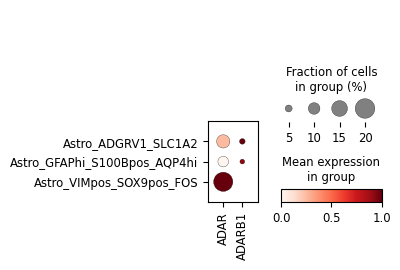

/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


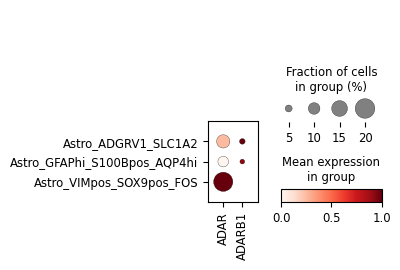

In [39]:
# Plot all data combined with 2 genes
genes = ['ADAR', 'ADARB1']
sc.pl.dotplot(adata, genes, groupby='annotation_level_2', cmap = 'Reds', standard_scale = 'var', save='ACC_alldata_dotplot_astro_2ADARgenes.png')
sc.pl.dotplot(adata, genes, groupby='annotation_level_2', cmap = 'Reds', standard_scale = 'var', save='ACC_alldata_dotplot_astro_2ADARgenes.pdf')

/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


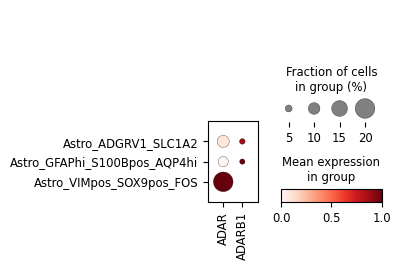

/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


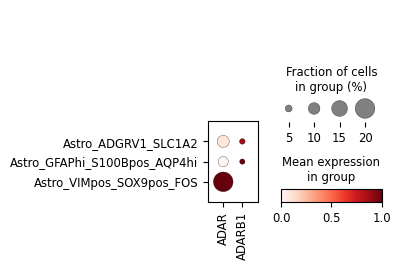

/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


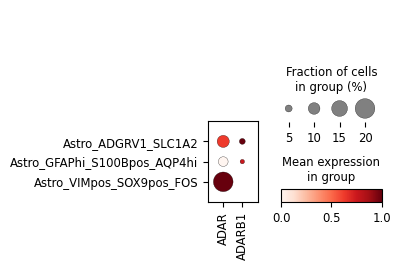

/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


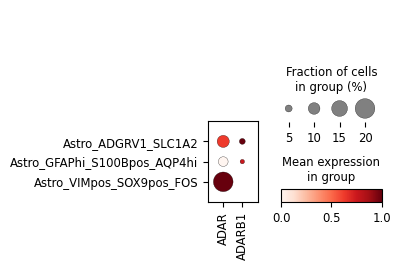

/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


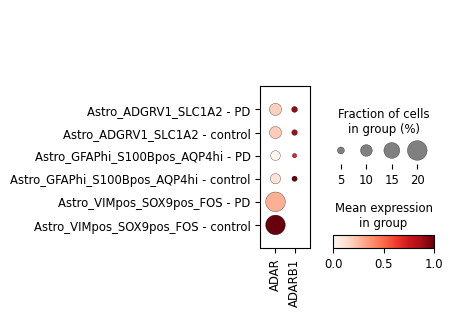

/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


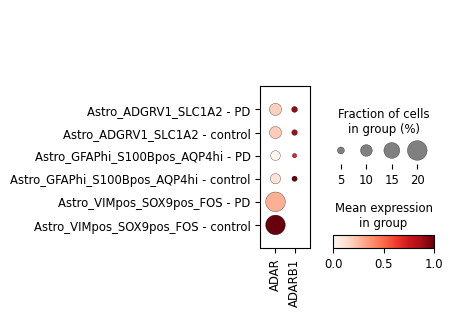

In [40]:
# Plot astrocytic subtypes by disease and control
sc.pl.dotplot(adata[adata.obs['disease']=='control'], genes, groupby='annotation_level_2', cmap = 'Reds', standard_scale = 'var', save='ACC_control_dotplot_astro_ADARgenes.png')
sc.pl.dotplot(adata[adata.obs['disease']=='control'], genes, groupby='annotation_level_2', cmap = 'Reds', standard_scale = 'var', save='ACC_control_dotplot_astro_ADARgenes.pdf')
sc.pl.dotplot(adata[adata.obs['disease']=='PD'], genes, groupby='annotation_level_2', cmap = 'Reds', standard_scale = 'var', save='ACC_PD_dotplot__astro_ADARgenes.png')
sc.pl.dotplot(adata[adata.obs['disease']=='PD'], genes, groupby='annotation_level_2', cmap = 'Reds', standard_scale = 'var', save='ACC_PD_dotplot__astro_ADARgenes.pdf')
sc.pl.dotplot(adata[adata.obs['disease'].isin(['PD', 'control'])], genes, groupby='combined_astros', cmap='Reds', standard_scale='var', save='ACC_combined_dotplot_astro_ADARgenes.png')
sc.pl.dotplot(adata[adata.obs['disease'].isin(['PD', 'control'])], genes, groupby='combined_astros', cmap='Reds', standard_scale='var', save='ACC_combined_dotplot_astro_ADARgenes.pdf')

In [44]:
# Find percentage of each astrocyte subgroup that express ADAR
# Filter to just Astrocytes
adata = adata[(adata.obs['annotation_level_1']=='Astrocytes')]

# Find cells that express adar via boolean mask
adar_mask = adata[:, 'ADAR'].X>0
# Add this mask as a column to the .obs DataFrame
adata.obs['ADAR_expr'] = adar_mask
# Group by 'annotation_level_2' and calculate the fraction of cells expressing ADAR
fraction_expressing_adar = adata.obs.groupby('annotation_level_2')['ADAR_expr'].mean()
print(fraction_expressing_adar)

/tmp/slurm_65492190/ipykernel_152794/2537394206.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['ADAR_expr'] = adar_mask


annotation_level_2
Astro_ADGRV1_SLC1A2             0.118617
Astro_GFAPhi_S100Bpos_AQP4hi    0.088333
Astro_VIMpos_SOX9pos_FOS        0.194030
Name: ADAR_expr, dtype: float64


/tmp/slurm_65492190/ipykernel_152794/2537394206.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraction_expressing_adar = adata.obs.groupby('annotation_level_2')['ADAR_expr'].mean()


In [83]:
# Find mean expression of each gene in each group:
mean_expression_per_group = df_raw_counts.groupby(adata.obs['annotation_level_2']).mean()

# Find the top expressed genes for each subgroup
n_top_genes = 2000
top_genes_per_subgroup = mean_expression_per_group.apply(lambda x: x.nlargest(n_top_genes).index, axis=1)

# Print the top genes for each subgroup
print(top_genes_per_subgroup)


/tmp/slurm_65492190/ipykernel_152794/3168943928.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_expression_per_group = df_raw_counts.groupby(adata.obs['annotation_level_2']).mean()


annotation_level_2
Astro_ADGRV1_SLC1A2             Index(['MALAT1', 'LSAMP', 'PCDH9', 'CTNNA2', '...
Astro_GFAPhi_S100Bpos_AQP4hi    Index(['MALAT1', 'DPP10', 'PCDH9', 'LSAMP', 'N...
Astro_VIMpos_SOX9pos_FOS        Index(['MALAT1', 'DPP10', 'CFAP299', 'NPAS3', ...
dtype: object


In [90]:
# Converting the output serioes to a dataframe where each list becomes a row
df_top_genes = top_genes_per_subgroup.apply(pd.Series)
df_top_genes.to_csv(os.path.join(path, 'top_2000_genes_per_astrocyte_subgroup.csv'), header=True)

In [72]:
# Perform differential expression analysis
sc.tl.rank_genes_groups(adata, groupby='annotation_level_2', method='t-test', reference='rest', key_added='rank_genes_astrocyte_subtypes')

/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


In [75]:
# Extract the top differentially expressed genes for a specific astrocyte subtype
astrocyte_subtype = 'Astro_ADGRV1_SLC1A2'
de_genes = adata.uns['rank_genes_astrocyte_subtypes']['names'][astrocyte_subtype]

# Print the top 10 genes
print(de_genes[:100])

['SLC1A2' 'CABLES1' 'CACNB2' 'GPC5' 'ARHGAP24' 'NRXN1' 'ZNF98' 'GRM3'
 'DLC1' 'SLC1A3' 'CADM1' 'TPD52L1' 'WIF1' 'SGCD' 'TMEM241' 'HPSE2' 'LRP1B'
 'GPM6A' 'COL5A3' 'PLCB1' 'RORA' 'LSAMP' 'PDE3B' 'RERG' 'SLC4A4' 'CADM2'
 'ERBB4' 'LINC00499' 'ADGRB3' 'NKAIN3' 'PDE4D' 'GLUL' 'PTN' 'VAV3' 'DNM3'
 'RANBP3L' 'AC092691.1' 'LRRC3B' 'GNA14' 'SOX5' 'ADGRL3' 'AC008957.2'
 'AP000462.1' 'CARMIL1' 'SLCO1C1' 'AL589740.1' 'F11-AS1' 'DNAH7' 'PREX2'
 'AC012404.1' 'FAM171B' 'AF279873.3' 'SYNE1' 'PCDH9' 'NHSL1' 'RBMS3-AS3'
 'FLRT2' 'AC073050.1' 'TRPM3' 'GABRB1' 'GABRA2' 'GNA14-AS1' 'ESRRG'
 'SLC39A12' 'MERTK' 'BRINP3' 'MACROD2' 'ADGRV1' 'SLC35F1' 'LSAMP-AS1'
 'HGF' 'GRIA2' 'GJA1' 'TOX' 'OPHN1' 'SH3RF1' 'GJB6' 'TMEM132C' 'PCDH9-AS2'
 'RORB' 'MAST4' 'TENM2' 'LGR4' 'CTNNA2' 'STXBP5' 'PIK3C2A' 'LRRC4C' 'RYR3'
 'RGS20' 'AC002429.2' 'GRAMD1C' 'ITSN1' 'RBMS3' 'SLC6A1-AS1' 'ME1'
 'SLC6A11' 'PTCHD1-AS' 'CHD9' 'PSD3' 'AC016716.2']


In [76]:
astrocyte_subtype = 'Astro_GFAPhi_S100Bpos_AQP4hi'
de_genes = adata.uns['rank_genes_astrocyte_subtypes']['names'][astrocyte_subtype]

# Print the top 10 genes
print(de_genes[:100])

['DPP10' 'LINC00609' 'DCLK1' 'TNC' 'GFAP' 'CD44' 'VCAN' 'AC073941.1'
 'HSPA1A' 'SLC38A1' 'WDR49' 'FOS' 'LINC01088' 'ID3' 'IGFBP5' 'DPP6' 'AQP1'
 'UBC' 'ADAMTSL3' 'HSPB1' 'GALNT15' 'KAZN' 'CRYAB' 'JUN' 'SNED1' 'PLEKHA5'
 'L3MBTL4' 'CERS6' 'APLNR' 'HSPA1B' 'LINC00836' 'TSHZ2' 'ADAMTS9-AS2'
 'SERPINI2' 'GPC6' 'AEBP1' 'JUNB' 'SLCO3A1' 'SLC24A4' 'SMAD9' 'GUCY1A1'
 'PFKFB2' 'ID1' 'AL162511.1' 'NAV1' 'DGKB' 'PLCE1' 'ID2' 'RHPN1' 'STXBP5L'
 'LINC01094' 'NFASC' 'H3F3B' 'ZFP36L1' 'S100B' 'SAMD11' 'MAN1C1' 'CCDC85A'
 'SPARC' 'ANGPT1' 'CPAMD8' 'DPP10-AS3' 'CYP4F12' 'ELN' 'KCNN2' 'DAAM2'
 'RASL12' 'KCNJ3' 'LPAR4' 'ROBO2' 'DPYSL3' 'GADD45B' 'ADAMTS9' 'ADM'
 'ITGB4' 'HSPB8' 'CFAP47' 'CP' 'SYNPO2' 'GAPDH' 'AQP4-AS1' 'ARHGEF4'
 'AP1S2' 'S100A6' 'FAM189A2' 'B3GAT2' 'USH1C' 'MARCH3' 'GRIA1' 'RNF19A'
 'AL031056.1' 'PLXDC2' 'ABCC4' 'ANGPTL4' 'LINC01411' 'TTN' 'KCNE4' 'SMOC1'
 'DUSP1' 'AHNAK']


In [77]:
astrocyte_subtype = 'Astro_VIMpos_SOX9pos_FOS'
de_genes = adata.uns['rank_genes_astrocyte_subtypes']['names'][astrocyte_subtype]

# Print the top 100 genes
print(de_genes[:100])

['CFAP299' 'C8orf34' 'DNAH9' 'CFAP157' 'AGBL4' 'CFAP54' 'HYDIN' 'LRRIQ1'
 'CFAP43' 'DTHD1' 'CSMD3' 'ARMC3' 'CFAP47' 'DNAH6' 'DCDC1' 'DNAH12'
 'SPAG17' 'DNAH11' 'ADGB' 'LMNTD1' 'WDR49' 'ULK4' 'TTC29' 'DYNC2H1'
 'TMEM232' 'ZBBX' 'DPP6' 'LINC01088' 'DNAAF1' 'RSPH1' 'VWA3A' 'CCDC30'
 'TTC6' 'RFX3' 'CFAP73' 'LRRC9' 'CFAP44' 'EYA4' 'PACRG' 'PPP1R42' 'DPP10'
 'SLC47A2' 'KIAA0825' 'PLEKHA5' 'WDR60' 'CFAP70' 'SPAG8' 'CASC15' 'DMD'
 'NEK11' 'LINC02055' 'SPEF2' 'NEK5' 'CFAP221' 'CAPS' 'AL357093.2' 'KAZN'
 'SERPINI2' 'DNAH7' 'SPAG16' 'SDK1' 'WDR63' 'RASGEF1B' 'ARMC4' 'KIAA2012'
 'C4orf47' 'FANK1' 'CRB1' 'DNAI1' 'CSPP1' 'AC019330.1' 'STK33' 'TOB1'
 'TMEM67' 'DRC3' 'STRBP' 'CFAP69' 'CNTN3' 'LINGO1' 'CASC2' 'NEK10'
 'TCTEX1D1' 'CFAP52' 'EFCAB2' 'TSGA10' 'DOC2A' 'DNAH3' 'LRGUK' 'SPATA17'
 'SPAG6' 'FGF14' 'EFHC1' 'CCDC146' 'CASC1' 'DNAI2' 'PLXDC2' 'VWA3B' 'GPC6'
 'RGS22' 'ROBO2']
